<a href="https://colab.research.google.com/github/JudsonLima/computationalImaging/blob/master/Final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging Term project

Judson Lima

OPTI 556, Fall 2023

#Libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

from skimage import io
from skimage import color, data, restoration, exposure, filters
from skimage.filters import threshold_triangle


from scipy.signal import convolve2d, convolve
from scipy.signal import bspline


# For generating some data
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans
from sklearn import mixture

# For creating some circles around the center of each cluster within the visualizations
from scipy.spatial.distance import cdist
# For creating some circles for probability area around the center of each cluster within the visualizations
from matplotlib.patches import Ellipse

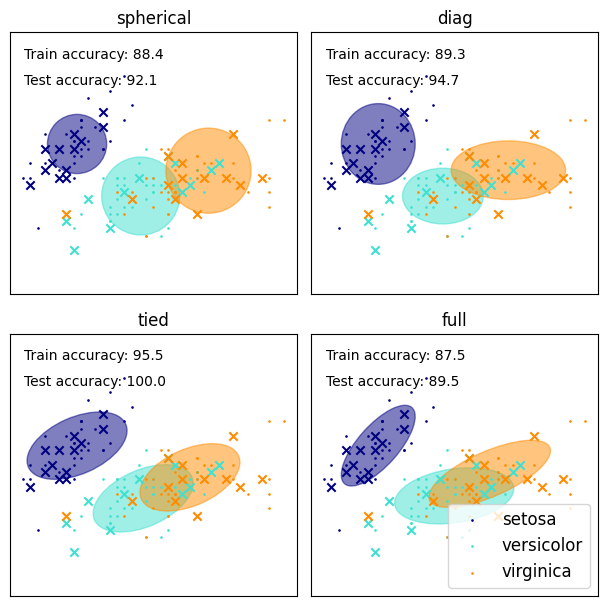

In [40]:
colors = ["navy", "turquoise", "darkorange"]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")


iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)

for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=iris.target_names[n]
        )
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))

plt.show()



In [2]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/680nm_WP_CenterSlice1.png

--2023-12-11 22:31:39--  https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/680nm_WP_CenterSlice1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177263 (173K) [image/png]
Saving to: ‘680nm_WP_CenterSlice1.png.2’

680nm_WP_CenterSlic 100%[===================>] 173.11K  --.-KB/s    in 0.007s  

2023-12-11 22:31:39 (25.9 MB/s) - ‘680nm_WP_CenterSlice1.png.2’ saved [177263/177263]



In [20]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/705nm_skinSample_CenterSlice1.png

--2023-12-05 20:40:23--  https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/705nm_skinSample_CenterSlice1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153164 (150K) [image/png]
Saving to: ‘705nm_skinSample_CenterSlice1.png’

705nm_skinSample_Ce 100%[===================>] 149.57K  --.-KB/s    in 0.04s   

2023-12-05 20:40:23 (3.71 MB/s) - ‘705nm_skinSample_CenterSlice1.png’ saved [153164/153164]



In [21]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/680nm_WP_CenterSlice2.png

--2023-12-05 20:40:32--  https://raw.githubusercontent.com/JudsonLima/computationalImaging/master/images/680nm_WP_CenterSlice2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166412 (163K) [image/png]
Saving to: ‘680nm_WP_CenterSlice2.png’

680nm_WP_CenterSlic 100%[===================>] 162.51K  --.-KB/s    in 0.04s   

2023-12-05 20:40:32 (4.39 MB/s) - ‘680nm_WP_CenterSlice2.png’ saved [166412/166412]



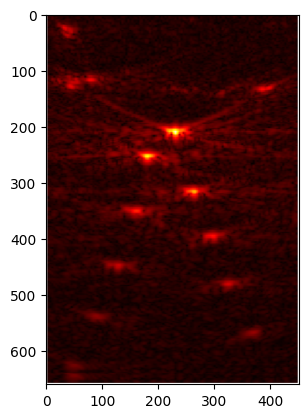

In [3]:
wireSplice = io.imread('680nm_WP_CenterSlice1.png')

plt.imshow(wireSplice, cmap='gray')

#plt.savefig('initialPhoto.pdf')
#files.download('initialPhoto.pdf')

In [4]:
grayScale_wireSplice = io.imread('680nm_WP_CenterSlice1.png', as_gray=True)


<ipython-input-13-ec5f1f08c6a8>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

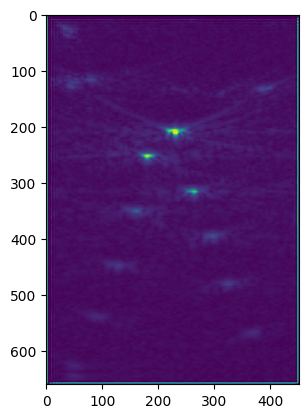

In [13]:
xrange=np.linspace(-3,3,16)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(grayScale_wireSplice, psf, 'same')
#add noise

deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)

plt.imshow(deconvolvedRL)

plt.savefig('16psf100iterations.pdf')
files.download('16psf100iterations.pdf')

<ipython-input-14-db10b3b7264a>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

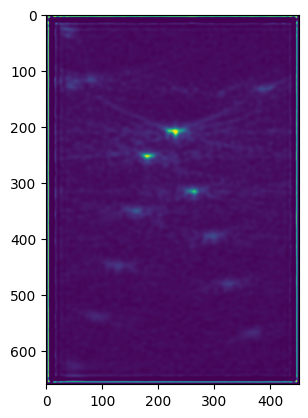

In [14]:
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(grayScale_wireSplice, psf, 'same')
#add noise

deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)

plt.imshow(deconvolvedRL)

plt.savefig('32psf100iterations.pdf')
files.download('32psf100iterations.pdf')

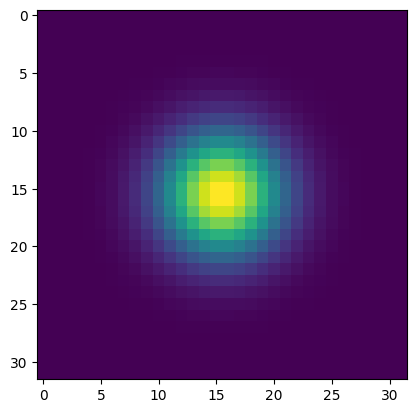

In [34]:
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)

psf = np.exp(-(x**2+y**2))

plt.imshow(psf)

<ipython-input-15-d9caf2a87c31>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

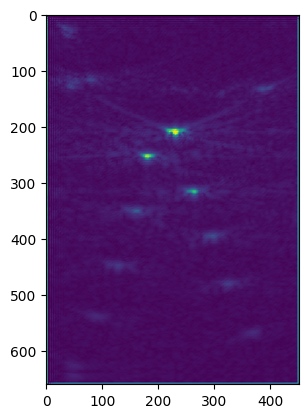

In [15]:
xrange=np.linspace(-3,3,12)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(grayScale_wireSplice, psf, 'same')
#add noise

deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)

plt.imshow(deconvolvedRL)

plt.savefig('12psf100iterations.pdf')
files.download('12psf100iterations.pdf')

<ipython-input-19-e233e70cc4fa>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=600)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

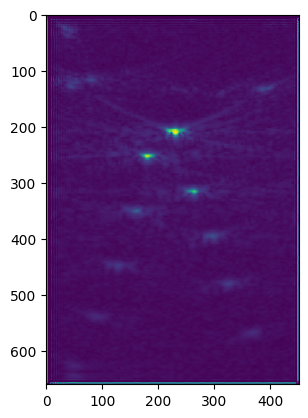

In [19]:
xrange=np.linspace(-3,3,16)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(grayScale_wireSplice, psf, 'same')
#add noise

deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=600)

plt.imshow(deconvolvedRL)

plt.savefig('16psf600iterations.pdf')
files.download('16psf600iterations.pdf')

<ipython-input-18-0b2779a61a1c>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=600)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

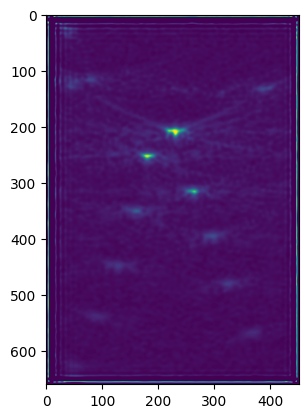

In [18]:
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(grayScale_wireSplice, psf, 'same')
#add noise

deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=600)

plt.imshow(deconvolvedRL)

plt.savefig('32psf600iterations.pdf')
files.download('32psf600iterations.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

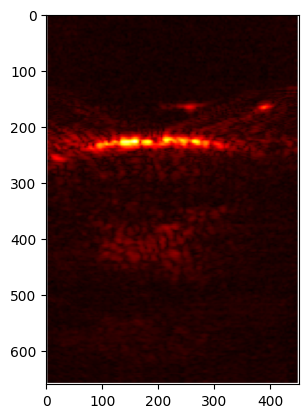

In [33]:
wireSplice = io.imread('705nm_skinSample_CenterSlice1.png')

plt.imshow(wireSplice, cmap='gray')

plt.savefig('initialPhoto1.pdf')
files.download('initialPhoto1.pdf')

In [ ]:
grayScale_Skinsample = io.imread('705nm_skinSample_CenterSlice1.png', as_gray=True)


<ipython-input-34-506bfcf56149>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

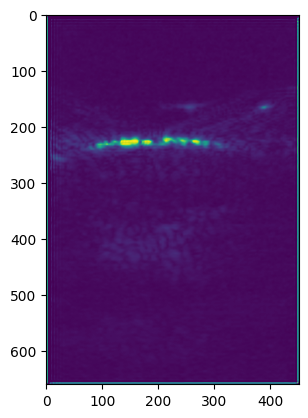

In [34]:
xrange=np.linspace(-3,3,16)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(grayScale_Skinsample, psf, 'same')
#add noise

deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)

plt.imshow(deconvolvedRL)

plt.savefig('16psf100iterations1.pdf')
files.download('16psf100iterations1.pdf')

<ipython-input-35-8256db346c3d>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

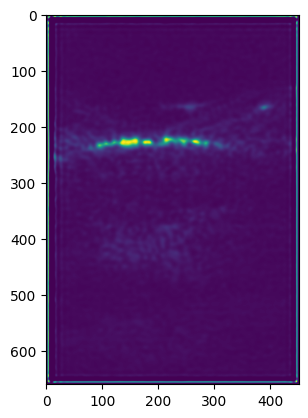

In [35]:
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(grayScale_Skinsample, psf, 'same')
#add noise

deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)

plt.imshow(deconvolvedRL)

plt.savefig('32psf100iterations1.pdf')
files.download('32psf100iterations1.pdf')

<ipython-input-36-8f4e0a8dafde>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

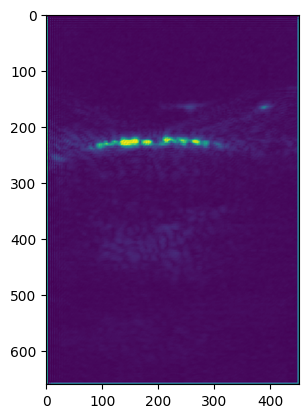

In [36]:
xrange=np.linspace(-3,3,12)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(grayScale_Skinsample, psf, 'same')
#add noise

deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)

plt.imshow(deconvolvedRL)

plt.savefig('12psf100iterations1.pdf')
files.download('12psf100iterations1.pdf')

<ipython-input-37-d87837ee6517>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=600)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

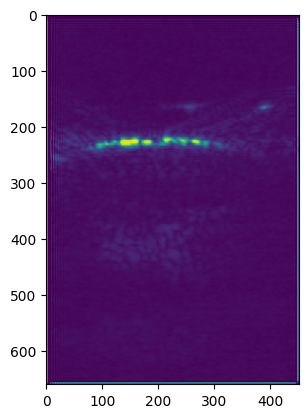

In [37]:
xrange=np.linspace(-3,3,16)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(grayScale_Skinsample, psf, 'same')
#add noise

deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=600)

plt.imshow(deconvolvedRL)

plt.savefig('16psf600iterations1.pdf')
files.download('16psf600iterations1.pdf')

<ipython-input-38-a6b3e43ebc86>:8: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=600)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

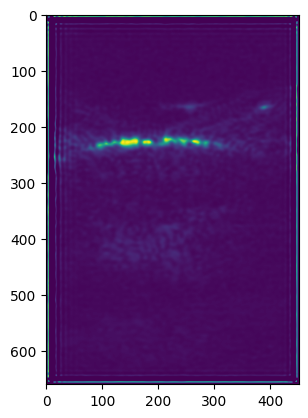

In [38]:
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(grayScale_Skinsample, psf, 'same')
#add noise

deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=600)

plt.imshow(deconvolvedRL)

plt.savefig('32psf600iterations1.pdf')
files.download('32psf600iterations1.pdf')

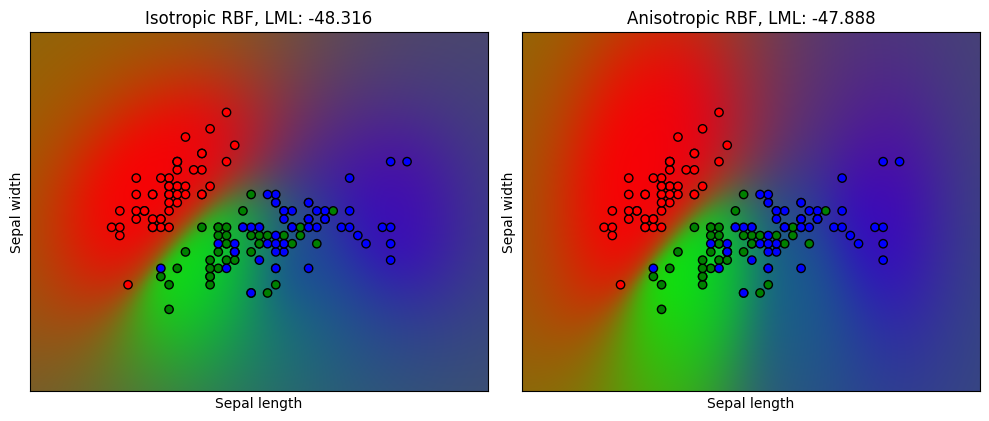

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = np.array(iris.target, dtype=int)

h = 0.02  # step size in the mesh

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y], edgecolors=(0, 0, 0))
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(
        "%s, LML: %.3f" % (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta))
    )

plt.tight_layout()
plt.show()

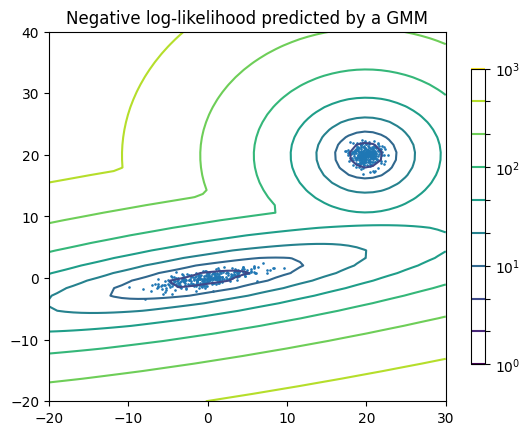

In [43]:
from matplotlib.colors import LogNorm

from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0.0, -0.7], [3.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

In [ ]:
shifted_gaussian

In [5]:
grayScale_wireSplice

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.27598039, ..., 0.26598039, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.26514706, ..., 0.26764706, 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [6]:
grayScale_wireSplice_inv=1-grayScale_wireSplice
grayScale_wireSplice_inv

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.72401961, ..., 0.73401961, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.73485294, ..., 0.73235294, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

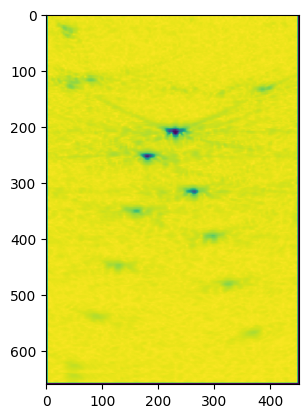

In [7]:
plt.imshow(grayScale_wireSplice_inv)

A = np.array(grayScale_wireSplice_inv)

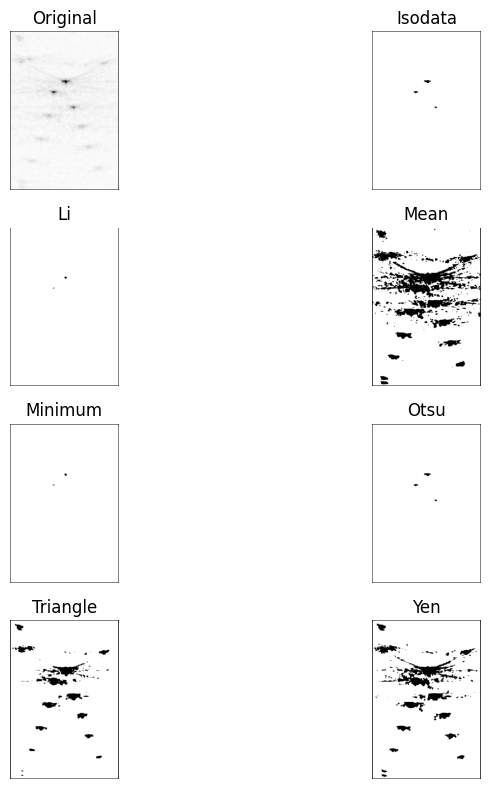

In [8]:
from skimage.filters import try_all_threshold

img = A

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

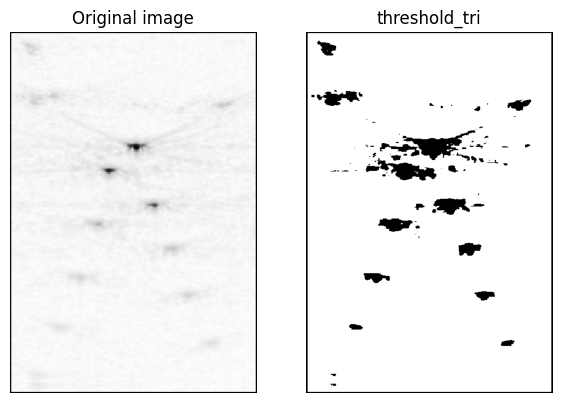

In [9]:

image = grayScale_wireSplice_inv
thresh = threshold_triangle(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=2, figsize=(7, 8))
ax = axes.ravel()
plt.gray()


ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('threshold_tri')

for a in ax:
    a.axis('off')

plt.show()

In [ ]:
#xrange=np.linspace(-3,3,16)
#x,y=np.meshgrid(xrange,xrange)
psf = binary
#psf=psf/np.sum(np.sum(psf))
Jeep_blured = convolve2d(grayScale_wireSplice, psf, 'same')
#add noise

deconvolvedRL = restoration.richardson_lucy(Jeep_blured, psf, iterations=100)

plt.imshow(deconvolvedRL)

#plt.savefig('16psf100iterations.pdf')
#files.download('16psf100iterations.pdf')

In [92]:
probs = gmm.predict_proba(binary)
probs

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [79]:
props = probs.round(3)
props

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

ValueError: ignored

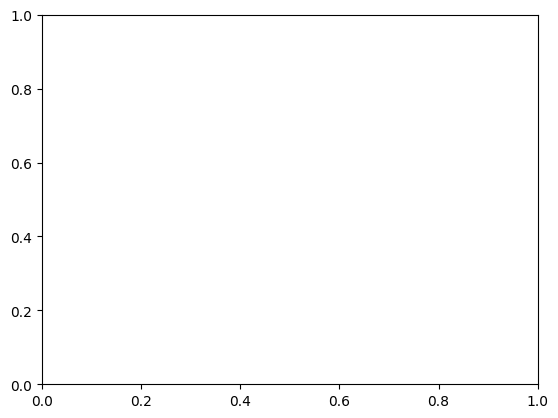

In [96]:

A = np.array(grayScale_wireSplice_inv)

x = np.linspace(0, 451, 451)
y = np.linspace(0, 660, 660)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T

#size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)


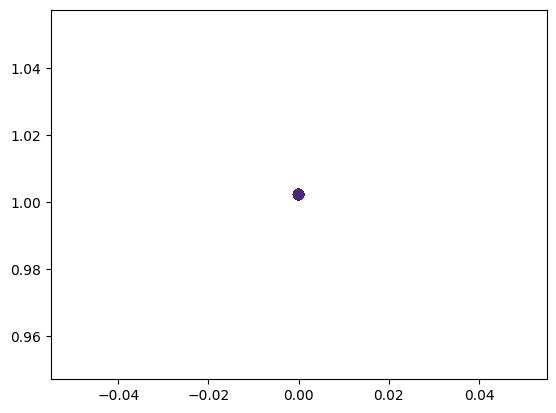

In [91]:
gmm = mixture.GaussianMixture(n_components=18)
gmm.fit(binary)
labels = gmm.predict(binary)

size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)


In [ ]:
X, y = make_blobs(n_samples=350, centers=4, n_features=2, cluster_std=0.67)
X = X[:, ::-1] # flip axes for better plotting
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


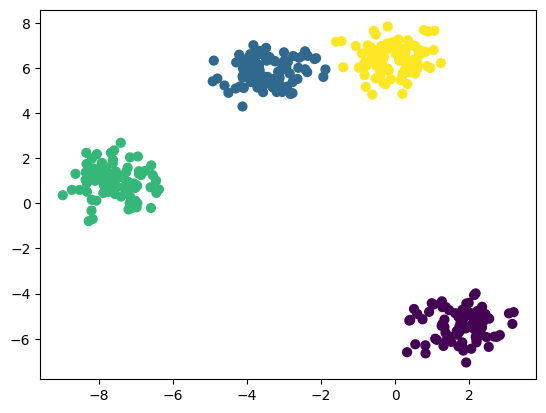

In [37]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')


In [88]:
#Keep in mind to change n_clusters accordingly

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


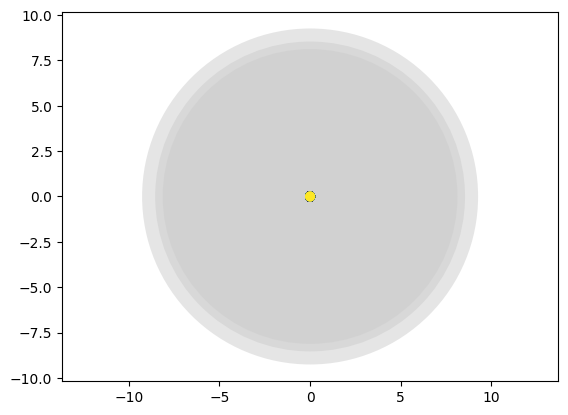

In [89]:
kmeans = KMeans(n_clusters=4)
plot_kmeans(kmeans, binary)

In [28]:
# transform the data to be stretched
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2))
X_stretched = np.dot(X, transformation)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


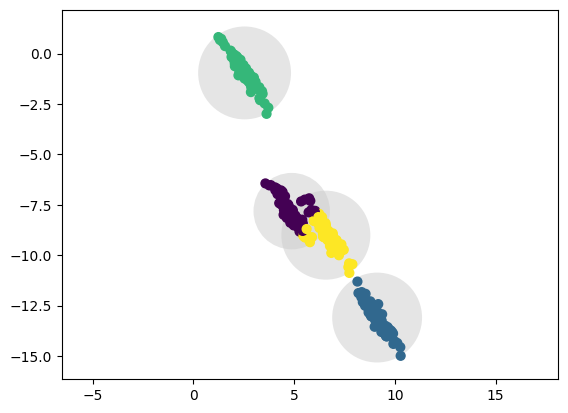

In [29]:
kmeans = KMeans(n_clusters=4)
plot_kmeans(kmeans, X_stretched)

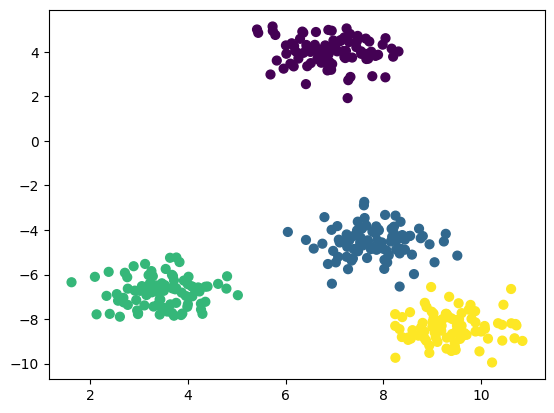

In [23]:
gmm = mixture.GaussianMixture(n_components=4)
gmm.fit(X)
labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')


In [41]:
probs = gmm.predict_proba(A)
probs

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [31]:
props = probs.round(3)
props

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

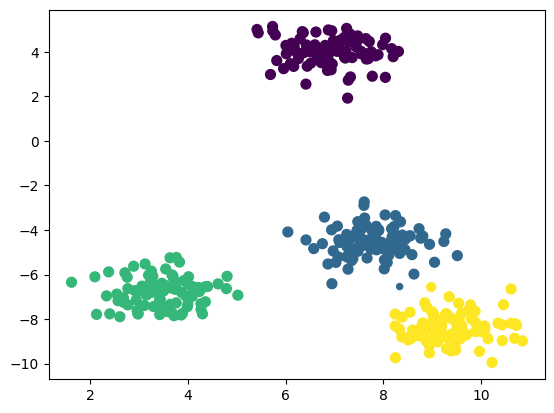

In [32]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)

In [27]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [ ]:
gmm = mixture.GaussianMixture(n_components=4)
plot_gmm(gmm, X)

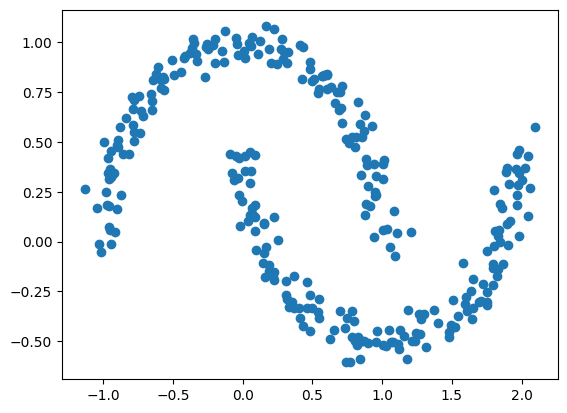

In [33]:
from sklearn.datasets import make_moons

Xmoon, ymoon = make_moons(300, noise=.06)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])